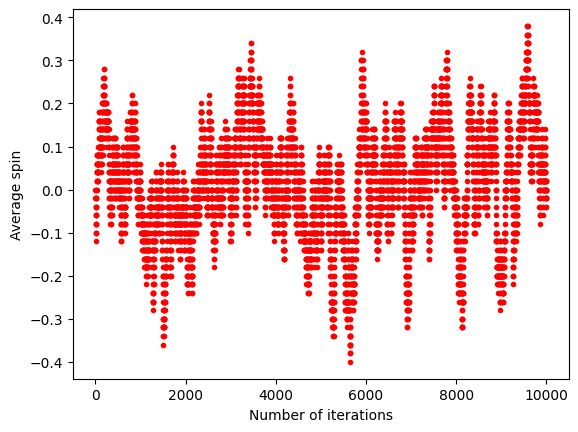

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def algorithm(N, J, beta):

    E = 0
    E_new = 0
    dE = 0
    spin = np.zeros((N,N))

 #Generating random spin configuration                               
    for i in range (0, N):
        for j in range (0, N):
            spin[i][j] = random.randrange(-1, 2, 2)
   
#Calculating the energy of configuration
    def energy(spin_arr):
        E_val = 0  
        for k in range (0, N):
            for l in range (0, N-1):
                E_val = E_val - J*spin_arr[k][l]*spin_arr[k][l+1]
        for n in range (0, N):
            for m in range (0, N-1):
                E_val = E_val - J*spin_arr[m][n]*spin_arr[m+1][n]         
        return E_val

#Performing iterations    
    for p in range (0, 10000):
        dE = 0
        x = random.randint(0, N-1)
        y = random.randint(0, N-1)

#Change in energy        
        if x > 0:
            dE = dE + 2*J*spin[x-1][y]*spin[x][y]
        if x < N-1:
            dE = dE + 2*J*spin[x][y]*spin[x+1][y]
        if y > 0:
            dE = dE + 2*J*spin[x][y-1]*spin[x][y]
        if y < N-1:
            dE = dE + 2*J*spin[x][y]*spin[x][y+1]

        spin_i = spin[x][y]

        E = energy(spin)
        E_new = E + dE

#Comparing energy values
        if((E_new <= E) or (math.exp(-beta*(E_new-E)) >= np.random.random())):
            E = E_new
            spin[x][y] = spin_i * (-1)

        spin_avg = np.sum(spin)/N**2

#Plotting results
        plt.plot(p, spin_avg, marker = 'o', markersize = '3', color = 'red')
        plt.xlabel("Number of iterations")
        plt.ylabel("Average spin")
        
algorithm(10, 1, 0.1)

